# `MMF_LP_modes` tutorial

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import lib.grid as grids
import lib.beams as beams
from lib.fiber import GrinFiber
from lib.modes import GrinLPMode
from lib.speckle import GrinSpeckle, DegenGrinSpeckle
from lib.coupling import GrinFiberCoupler, GrinFiberDegenCoupler
from lib.devices import MockDeformableMirror

## Create a beam on a 2D grid

GaussianBeam instance with:
  - Amplitude: 1
  - Width: 2e-05
  - Centers: [0. 0.]
  - Energy: 2506.3789795065777



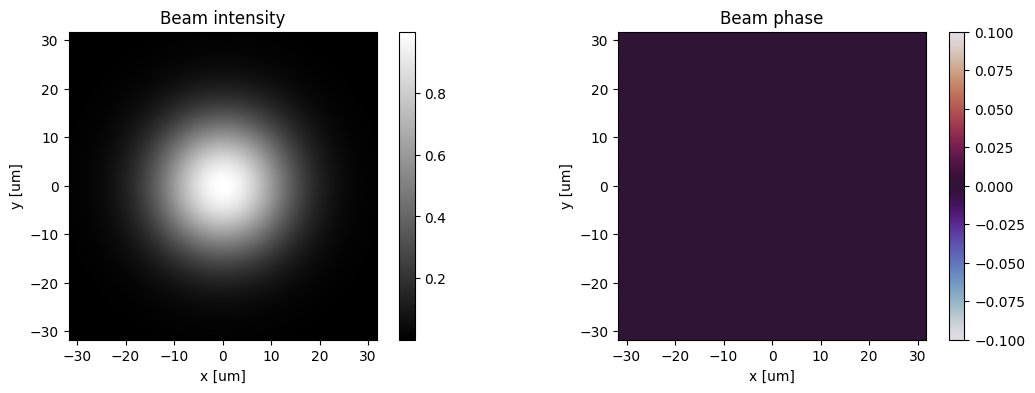

In [2]:
grid = grids.Grid(pixel_size=0.5e-6, pixel_numbers=(128,128))
beam = beams.GaussianBeam(grid)
beam.compute(amplitude=1, width=20e-6, centers=[0,0])
print(beam)
_ = beam.plot(complex=True)

## Create LP modes for a given fiber

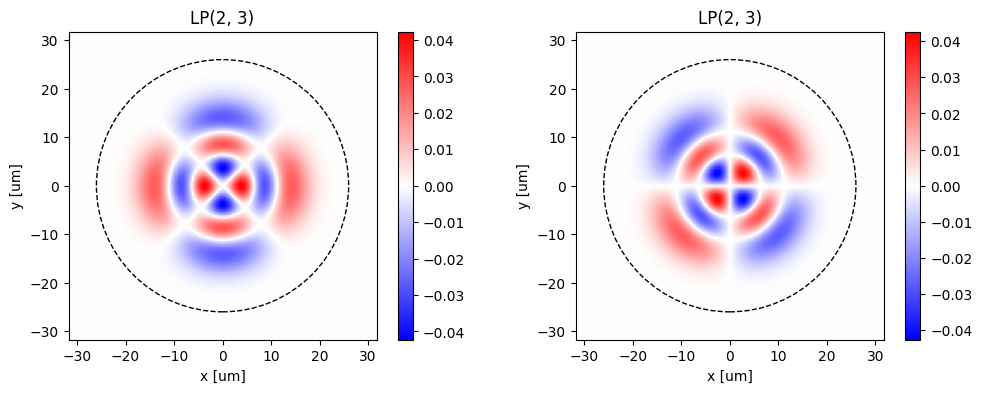

In [3]:
fiber = GrinFiber(radius=26e-6, wavelength=1064e-9, n1=1.465, n2=1.45)
mode = GrinLPMode(2, 3)
mode.compute(fiber, grid)
mode.plot()

## Generate modes coupling matrices from fiber

### Without separating degenerated LP modes

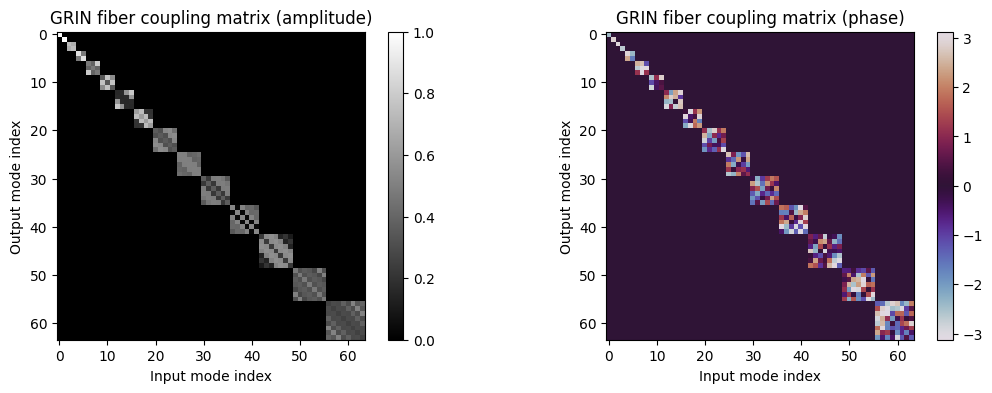

In [6]:
coupling_matrix = fiber.modes_coupling_matrix(complex=True, full=False, degen=False)
_ = fiber.plot_coupling_matrix(coupling_matrix, complex=True)

### Separating degenerated LP modes

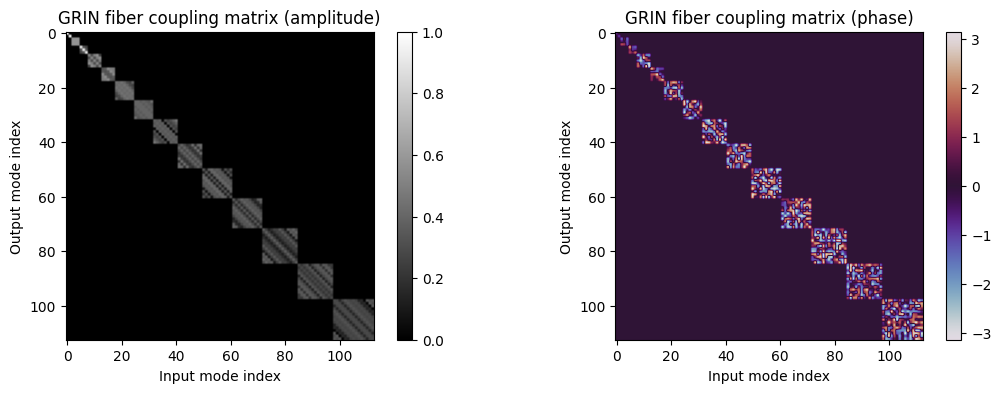

In [7]:
degen_coupling_matrix = fiber.modes_coupling_matrix(complex=True, full=False, degen=True)
_ = fiber.plot_coupling_matrix(degen_coupling_matrix, complex=True)

## Generate speckle from LP modes supported by GRIN fiber

### Without separating degenerated modes

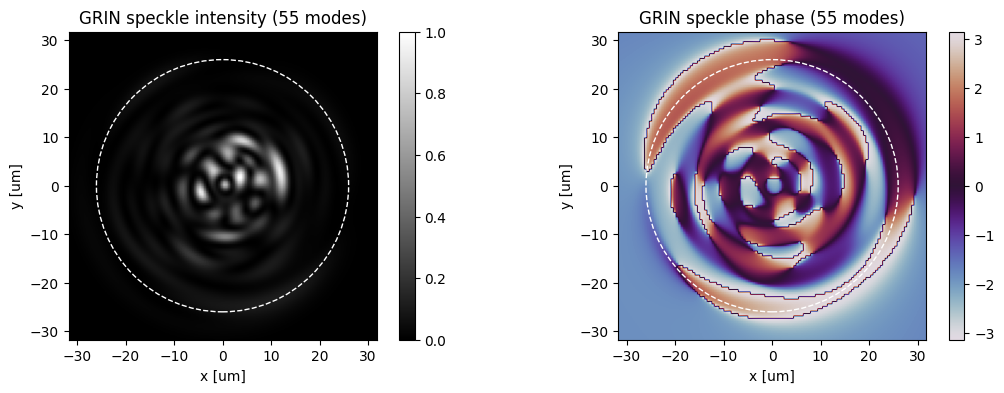

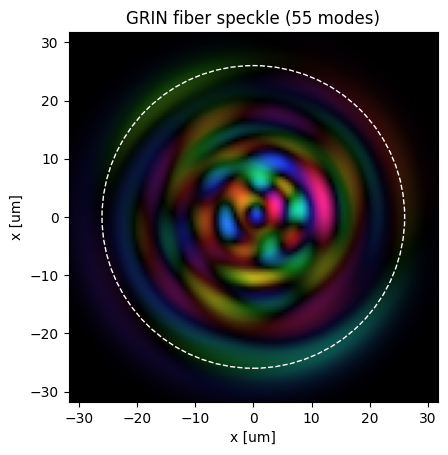

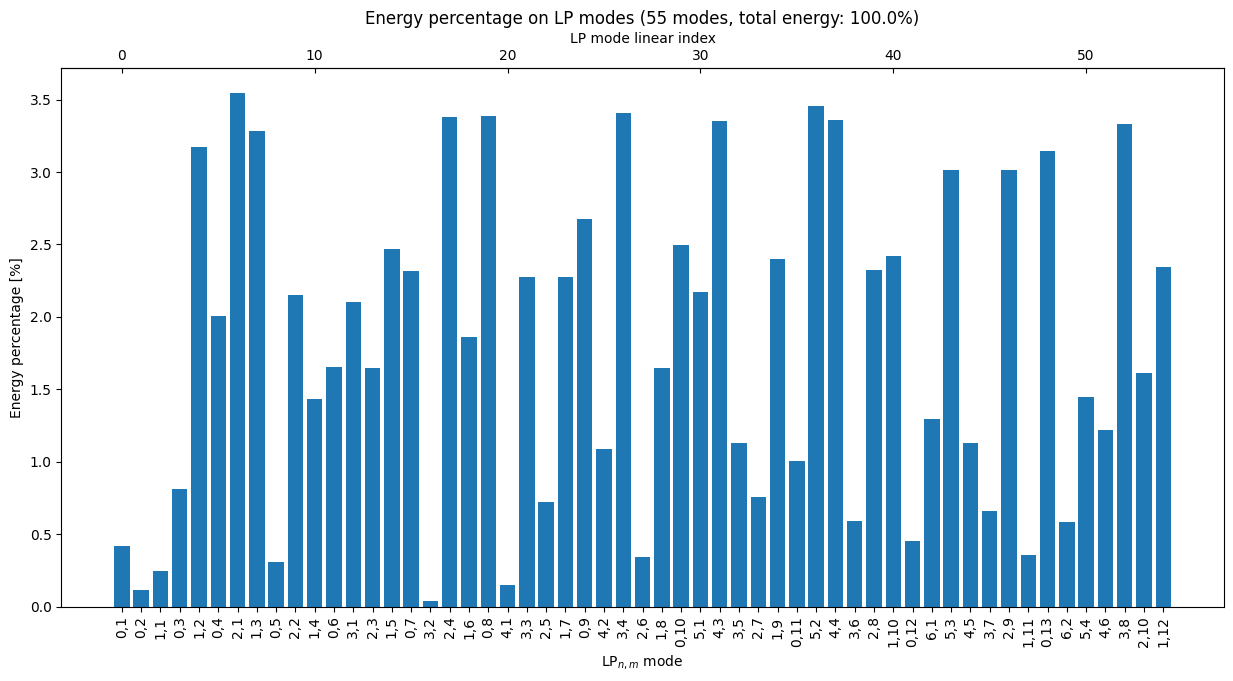

In [8]:
speckle = GrinSpeckle(fiber, grid, N_modes=55)
speckle.compose()
_ = speckle.plot(complex=True)
_ = speckle.plot(complex=True, complex_hsv=True)
_ = speckle.plot_coefficients()

### Separating degenerated modes

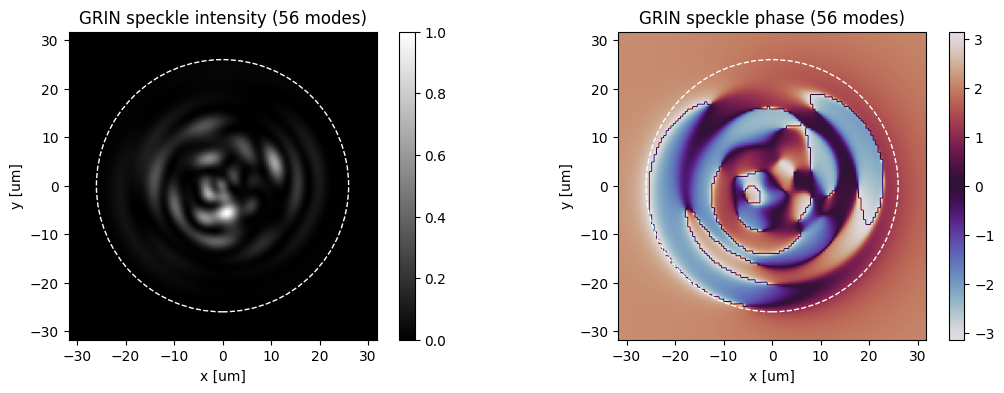

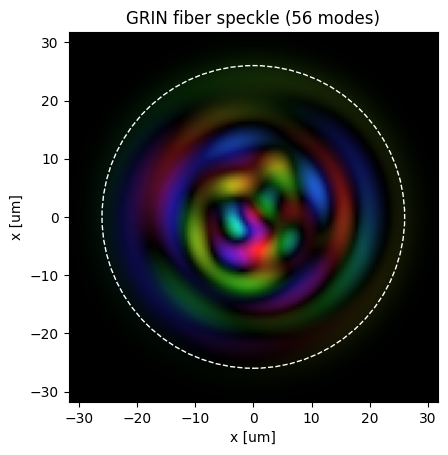

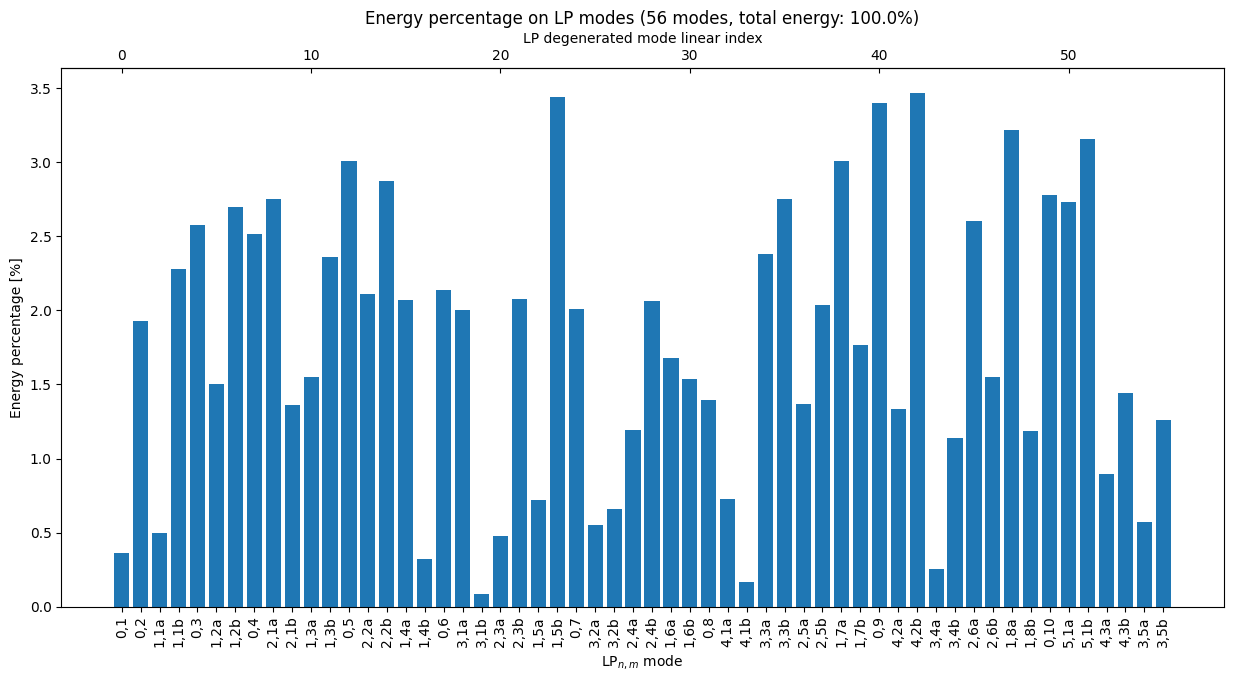

In [9]:
degen_speckle = DegenGrinSpeckle(fiber, grid, N_modes=56)
degen_speckle.compose()
_ = degen_speckle.plot(complex=True)
_ = degen_speckle.plot(complex=True, complex_hsv=True)
_ = degen_speckle.plot_coefficients()

## Couple energy into the GRIN fiber and propagate using the mode coupling matrix

### Pure modes, without separating degenerated modes

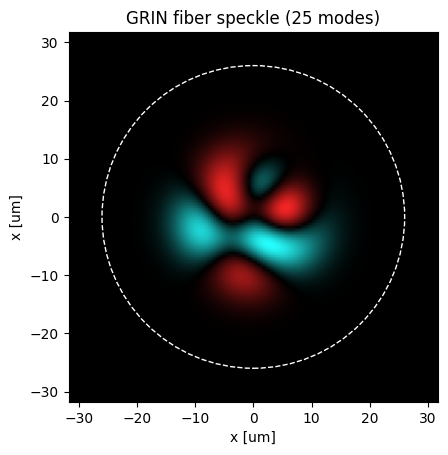

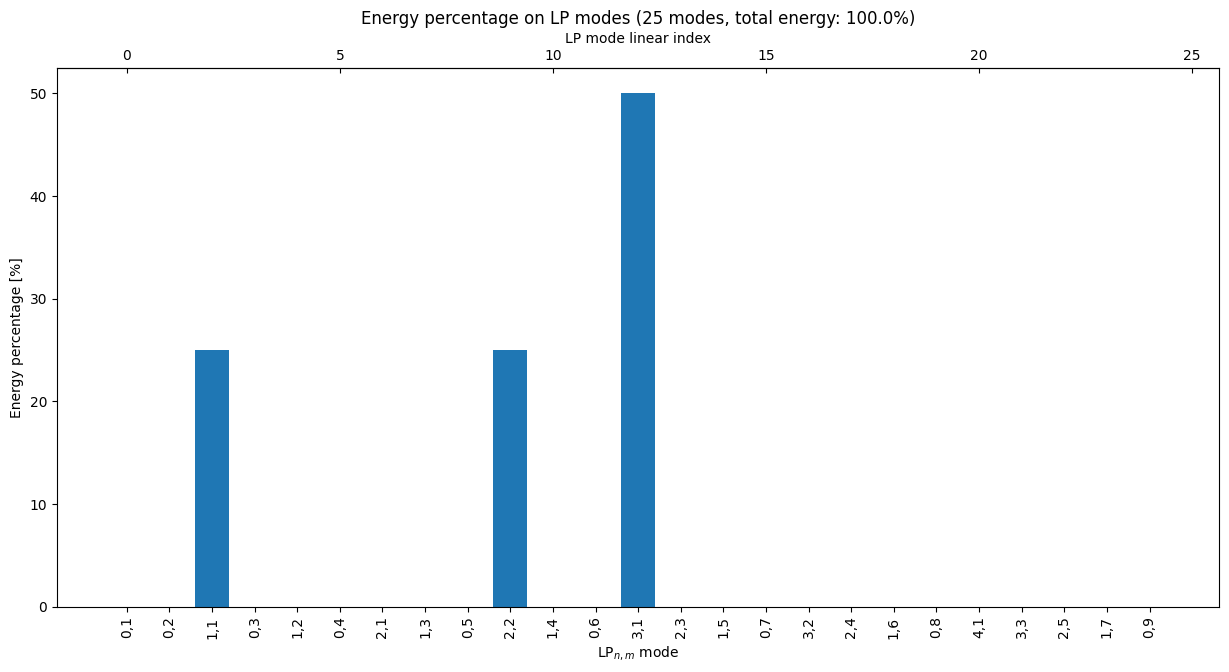

In [18]:
mode1 = GrinLPMode(2, 2)
mode1.compute(fiber, grid)
mode2 = GrinLPMode(3, 1)
mode2.compute(fiber, grid)
mode3 = GrinLPMode(1, 1)
mode3.compute(fiber, grid)
field = mode1._fields[:,:,0] + mode2._fields[:,:,1] + mode2._fields[:,:,0]  + mode3._fields[:,:,1]

coupled_in = GrinFiberCoupler(field, grid, fiber, N_modes=25)
_ = coupled_in.plot(cmap='gray', complex=True, complex_hsv=True)
_ = coupled_in.plot_coefficients()

propagated_field = coupled_in.propagate(matrix=coupling_matrix, complex=True)

### Pures modes, separating degenerated modes

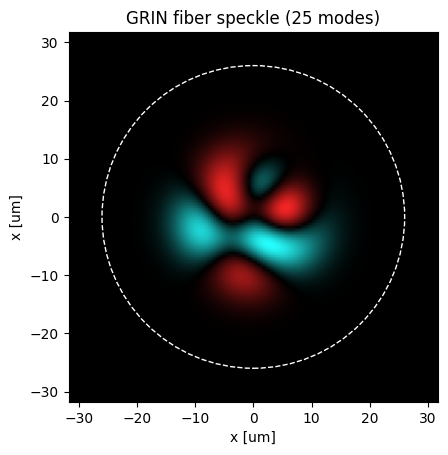

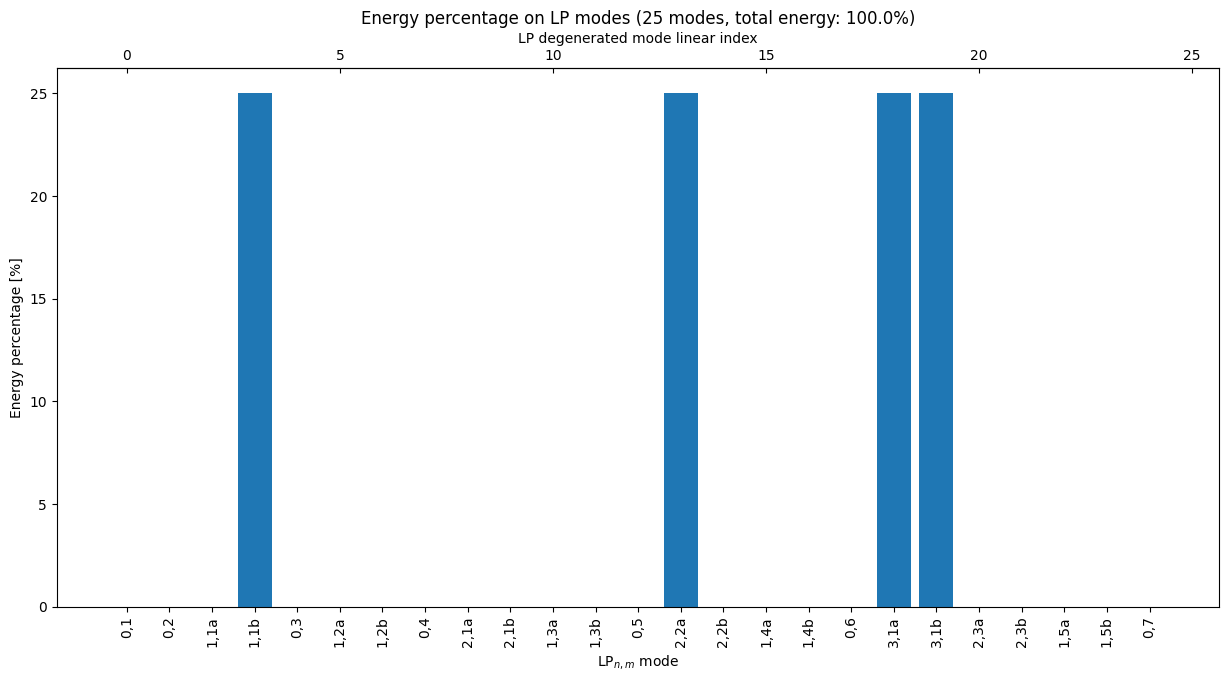

In [19]:
# mode1 = GrinLPMode(1, 1)
# mode1.compute(fiber, grid)
# mode2 = GrinLPMode(1, 2)
# mode2.compute(fiber, grid)
field = mode1._fields[:,:,0] + mode2._fields[:,:,0] + mode2._fields[:,:,1] + mode3._fields[:,:,1]
# field = mode1._fields[:,:,0] + mode2._fields[:,:,1]

coupled_in = GrinFiberDegenCoupler(field, grid, fiber, N_modes=25)
_ = coupled_in.plot(cmap='gray', complex=True, complex_hsv=True)
_ = coupled_in.plot_coefficients()

propagated_field = coupled_in.propagate(matrix=degen_coupling_matrix, complex=True)

### Gaussian beam with a flat phase, without separating degenerated modes

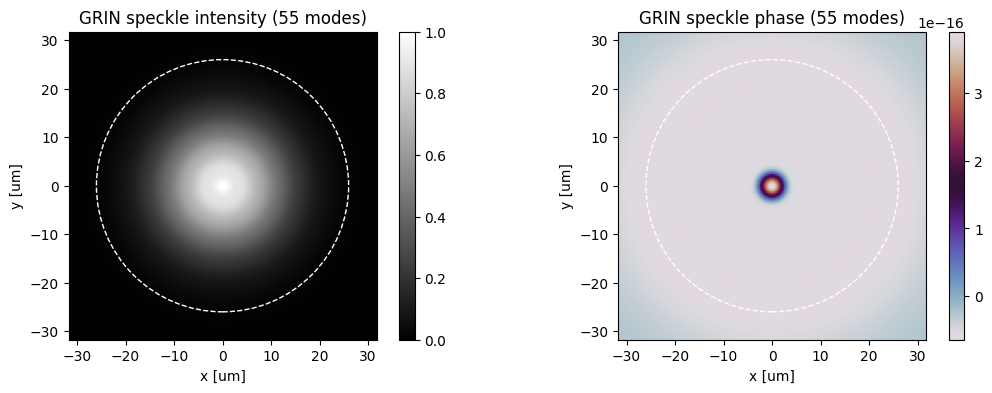

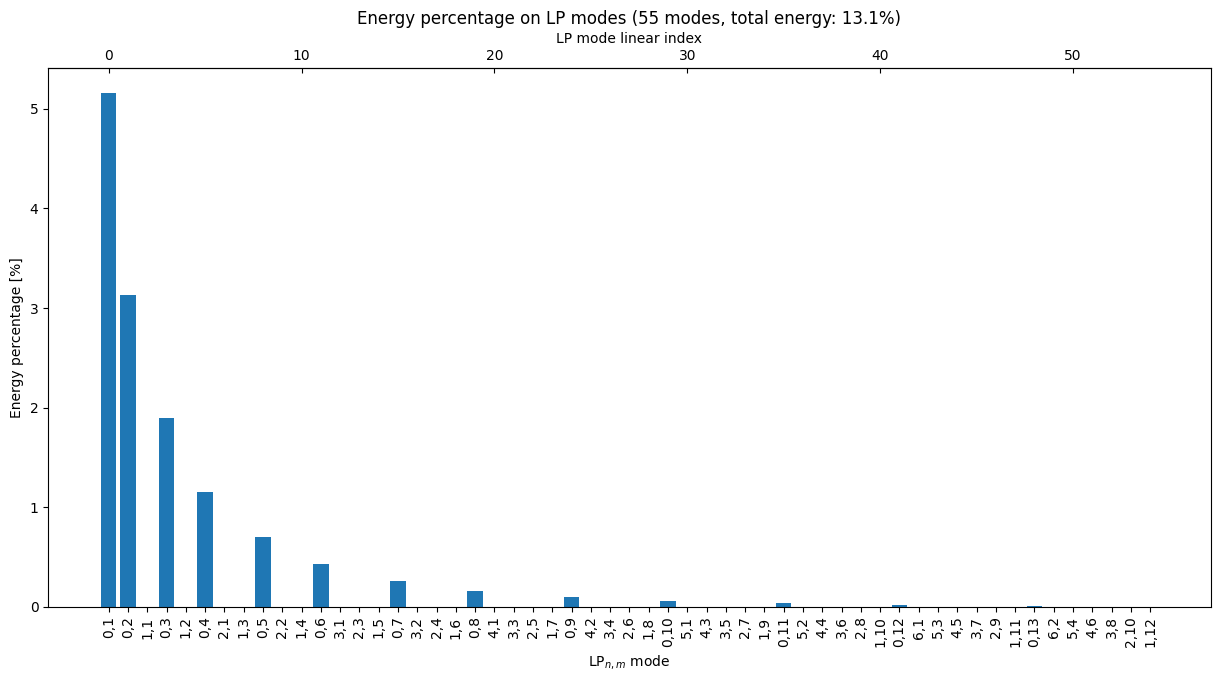

In [18]:
beam = beams.GaussianBeam(grid)
beam.compute(amplitude=1, width=fiber.radius, centers=[0,0])
beam.normalize_by_energy()

coupled_in = GrinFiberCoupler(beam.field, grid, fiber, N_modes=55)
_ = coupled_in.plot(cmap='gray', complex=True)
_ = coupled_in.plot_coefficients()

### Gaussian beam with a flat phase, separating degenerated modes

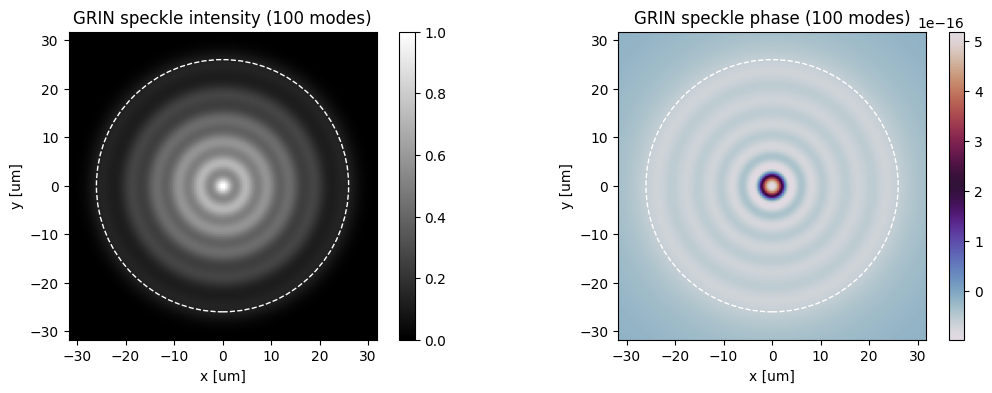

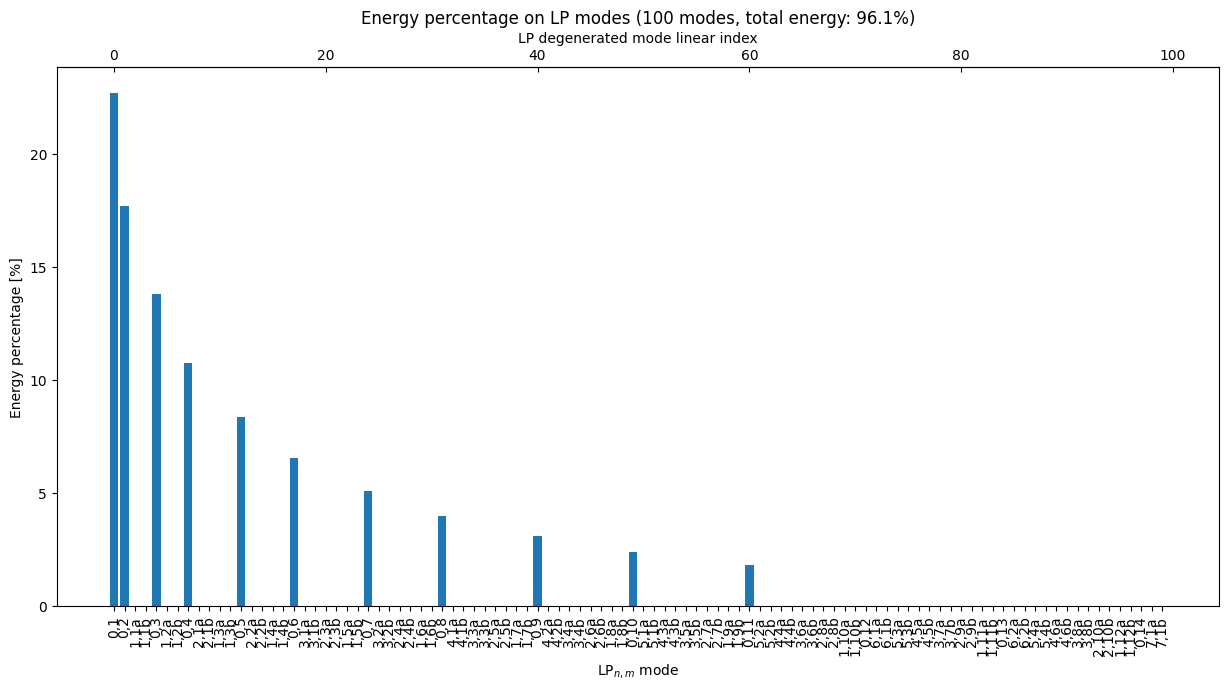

In [21]:
beam = beams.GaussianBeam(grid)
beam.compute(amplitude=1, width=fiber.radius, centers=[0,0])
beam.normalize_by_energy()

coupled_in = GrinFiberDegenCoupler(beam.field, grid, fiber, N_modes=100)
_ = coupled_in.plot(cmap='gray', complex=True)
_ = coupled_in.plot_coefficients()

### Gaussian beam limited by a deformable mirror, without separating degenerated modes

(<Figure size 1500x700 with 1 Axes>,
 <Axes: title={'center': 'Energy percentage on LP modes (55 modes, total energy: 17.0%)'}, xlabel='LP$_{n,m}$ mode', ylabel='Energy percentage [%]'>,
 <BarContainer object of 55 artists>)

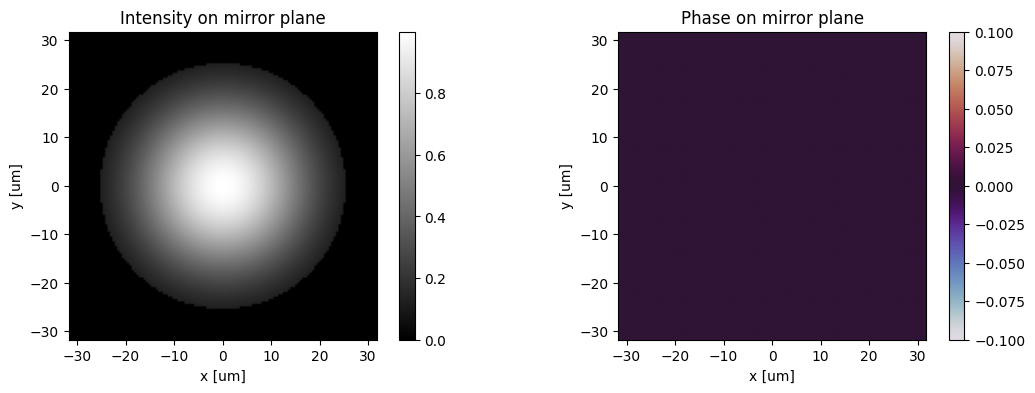

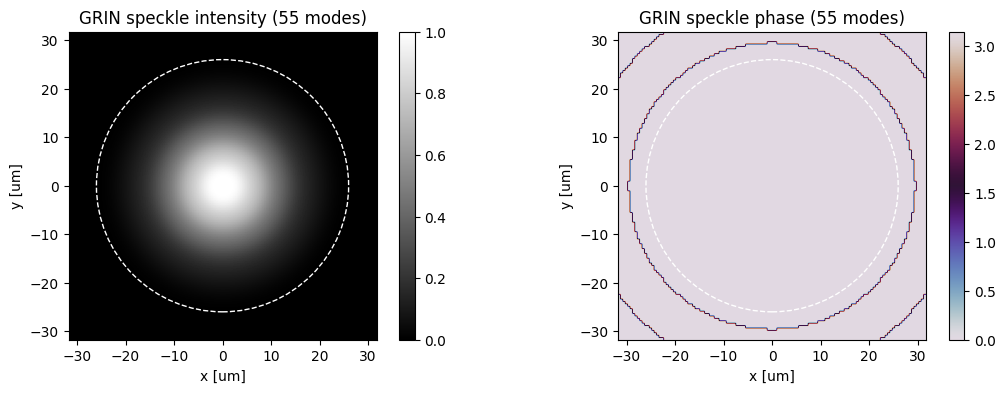

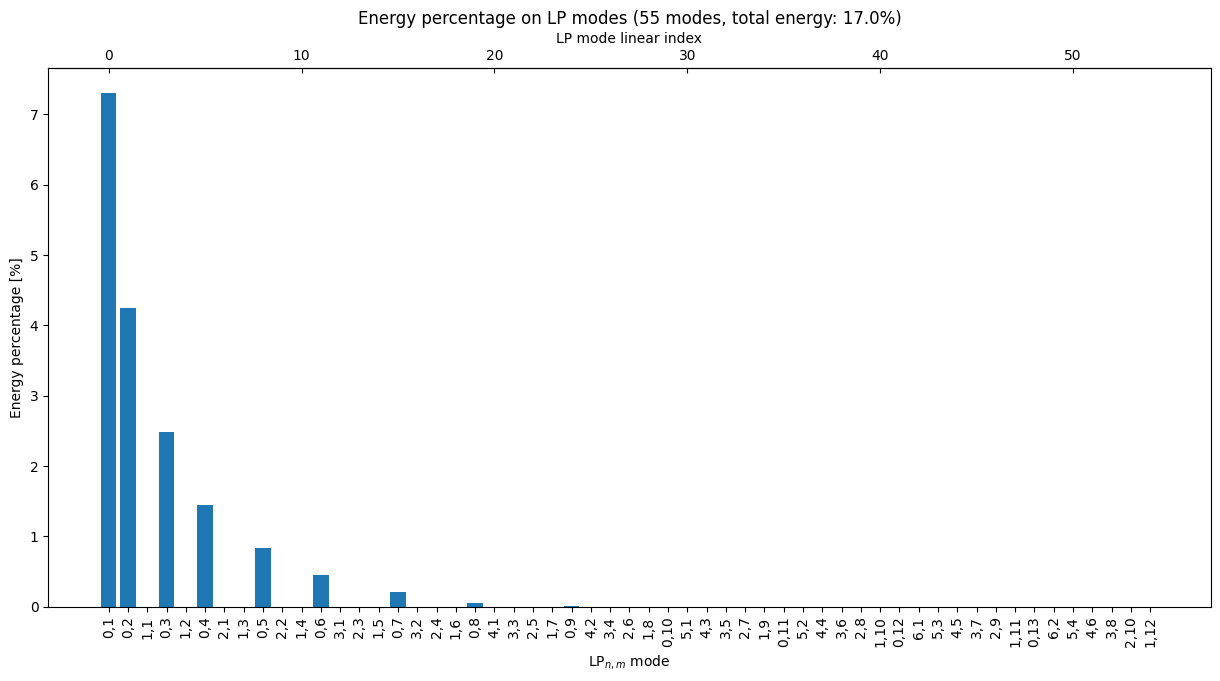

In [22]:
dm = MockDeformableMirror(pixel_size=100e-6, pixel_numbers=(128,128))
dm_grid = grids.Grid(pixel_size=dm.pixel_size, pixel_numbers=dm.pixel_numbers)
beam = beams.GaussianBeam(dm_grid)
beam.compute(amplitude=1, width=5000e-6, centers=[0,0])
dm.apply_amplitude_map(beam.amplitude)
dm.reduce_by(200)
dm.plot()

beam.grid.reduce_by(200)
beam.field = dm._field_matrix 
beam.normalize_by_energy()
coupled_in = GrinFiberCoupler(beam.field, beam.grid, fiber, N_modes=55)
coupled_in.plot(complex=True)
coupled_in.plot_coefficients()

### Gaussian beam limited by a deformable mirror, separating degenerated modes

(<Figure size 1500x700 with 1 Axes>,
 <Axes: title={'center': 'Energy percentage on LP modes (55 modes, total energy: 98.8%)'}, xlabel='LP$_{n,m}$ mode', ylabel='Energy percentage [%]'>,
 <BarContainer object of 55 artists>)

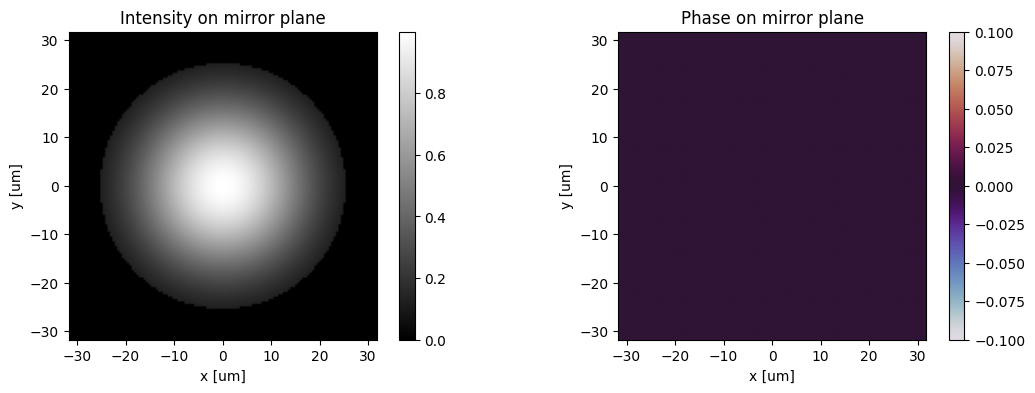

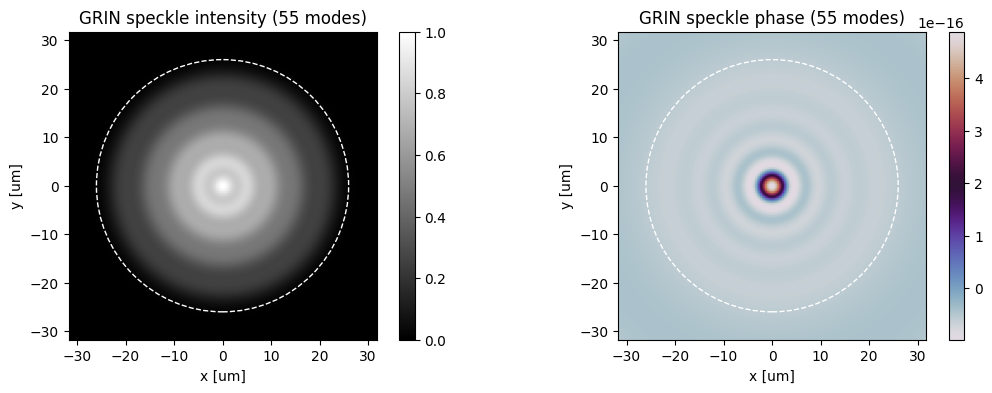

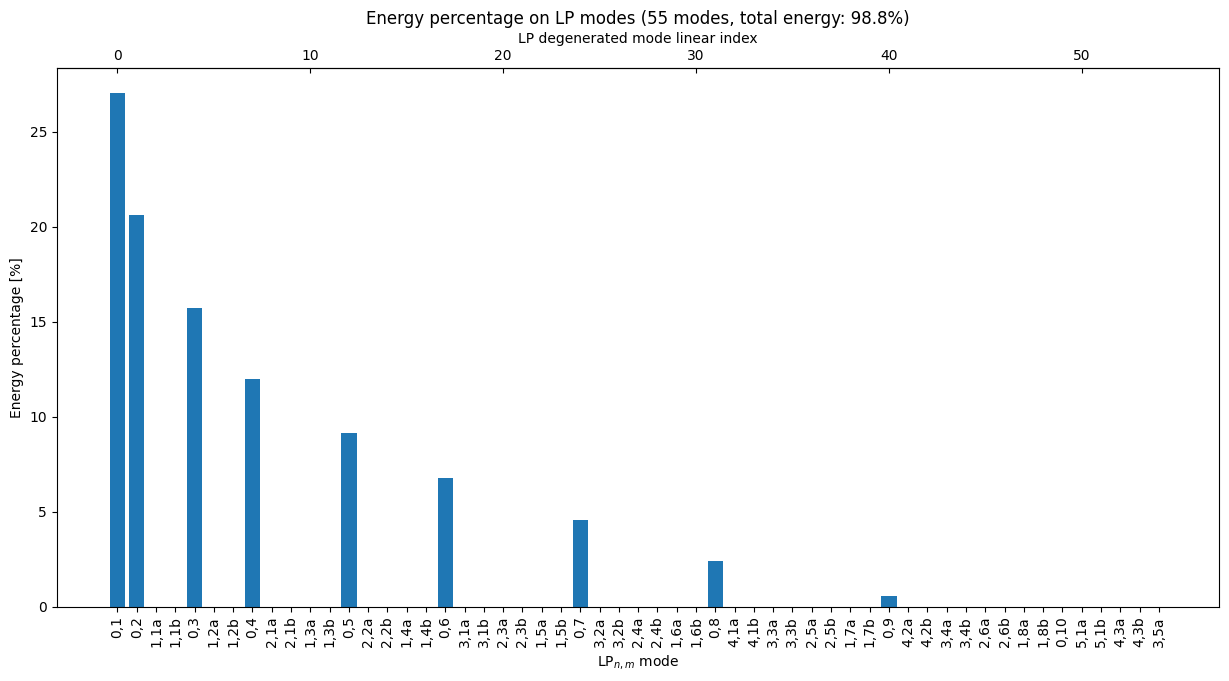

In [23]:
dm = MockDeformableMirror(pixel_size=100e-6, pixel_numbers=(128,128))
dm_grid = grids.Grid(pixel_size=dm.pixel_size, pixel_numbers=dm.pixel_numbers)
beam = beams.GaussianBeam(dm_grid)
beam.compute(amplitude=1, width=5000e-6, centers=[0,0])
dm.apply_amplitude_map(beam.amplitude)
dm.reduce_by(200)
dm.plot()

beam.grid.reduce_by(200)
beam.field = dm._field_matrix 
beam.normalize_by_energy()
coupled_in = GrinFiberDegenCoupler(beam.field, beam.grid, fiber, N_modes=55)
coupled_in.plot(complex=True)
coupled_in.plot_coefficients()

### Gaussian beam limited by a deformable mirror with macro-pixel phases, without separating degenerated modes

(<Figure size 1500x700 with 1 Axes>,
 <Axes: title={'center': 'Energy percentage on LP modes (55 modes, total energy: 44.5%)'}, xlabel='LP$_{n,m}$ mode', ylabel='Energy percentage [%]'>,
 <BarContainer object of 55 artists>)

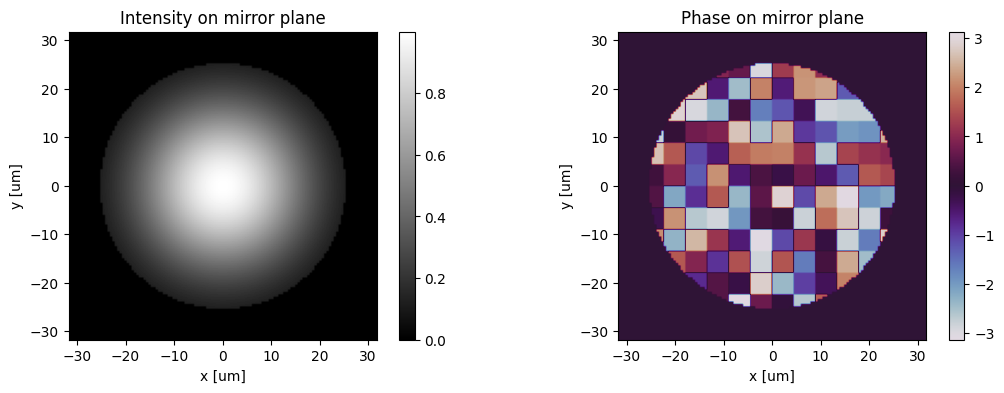

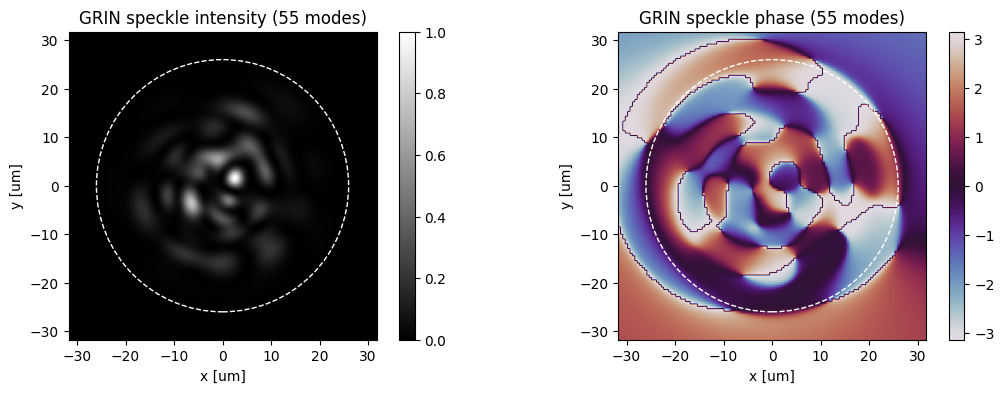

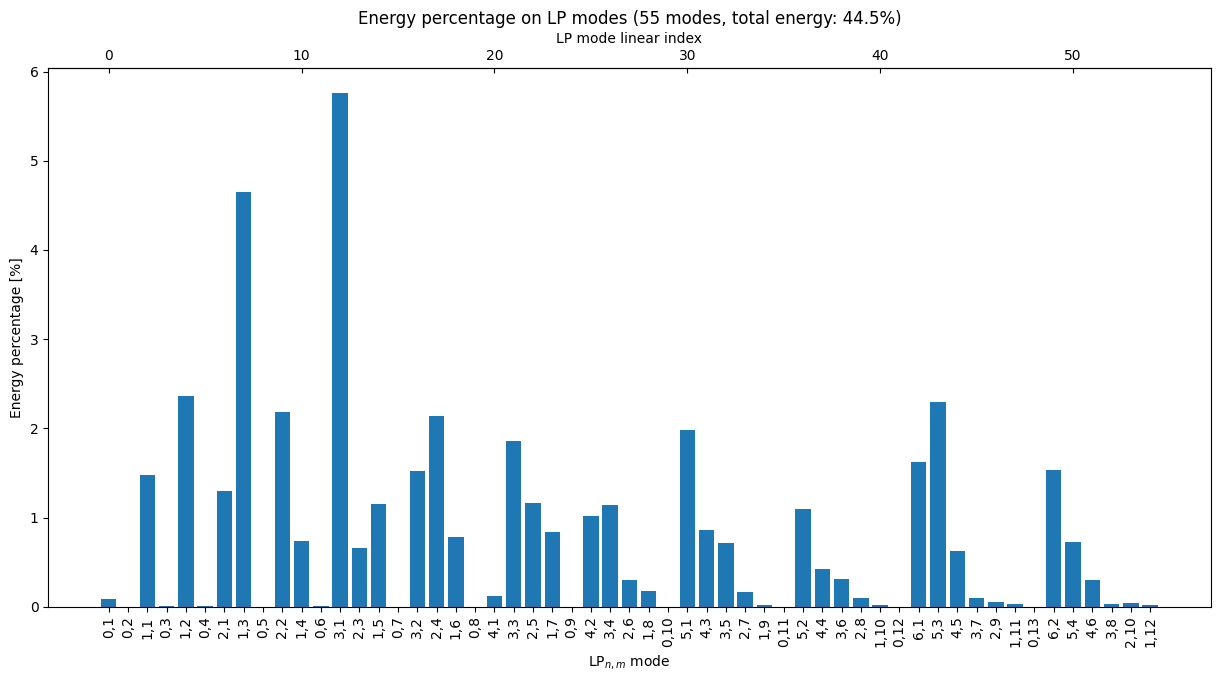

In [26]:
phase_map = 2*np.pi*np.random.rand(12,12)

dm = MockDeformableMirror(pixel_size=100e-6, pixel_numbers=(128,128))
dm.apply_phase_map(phase_map)
dm_grid = grids.Grid(pixel_size=dm.pixel_size, pixel_numbers=dm.pixel_numbers)
beam = beams.GaussianBeam(dm_grid)
beam.compute(amplitude=1, width=5000e-6, centers=[0,0])
dm.apply_amplitude_map(beam.amplitude)
dm.reduce_by(200)
dm.plot()

beam.grid.reduce_by(200)
beam.field = dm._field_matrix 
beam.normalize_by_energy()
coupled_in = GrinFiberCoupler(beam.field, beam.grid, fiber, N_modes=55)
coupled_in.plot(cmap='gray', complex=True)
coupled_in.plot_coefficients()

### Gaussian beam limited by a deformable mirror with macro-pixel phases, separating degenerated modes

(<Figure size 1500x700 with 1 Axes>,
 <Axes: title={'center': 'Energy percentage on LP modes (55 modes, total energy: 40.3%)'}, xlabel='LP$_{n,m}$ mode', ylabel='Energy percentage [%]'>,
 <BarContainer object of 55 artists>)

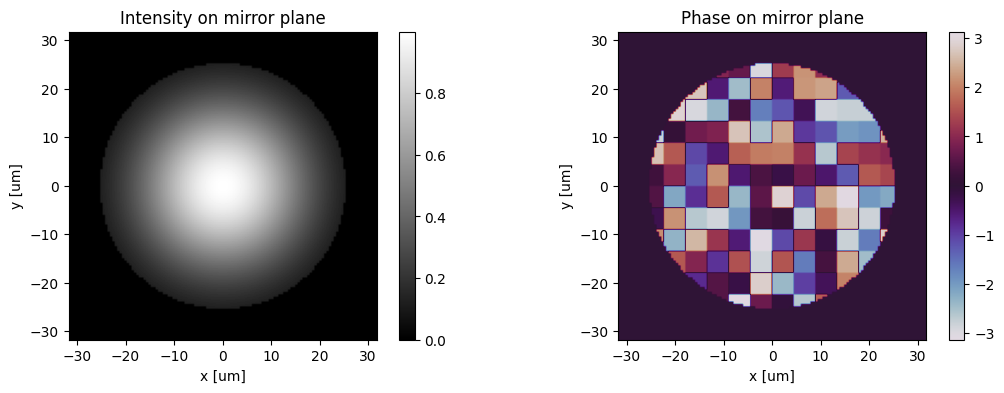

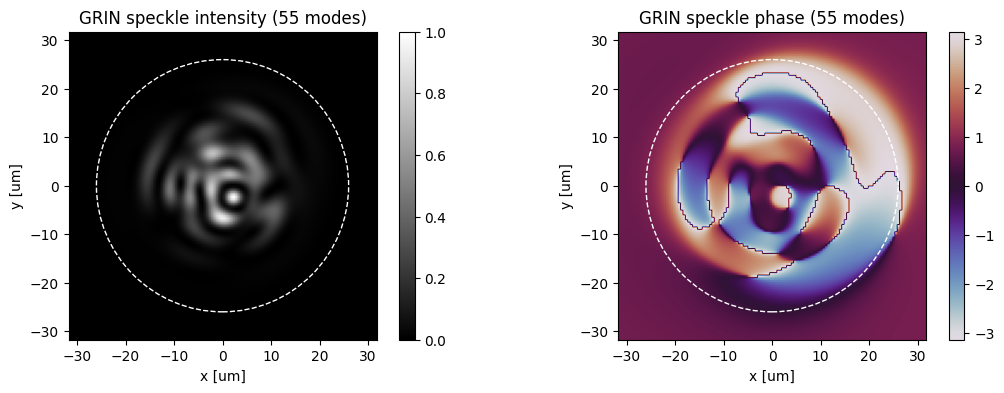

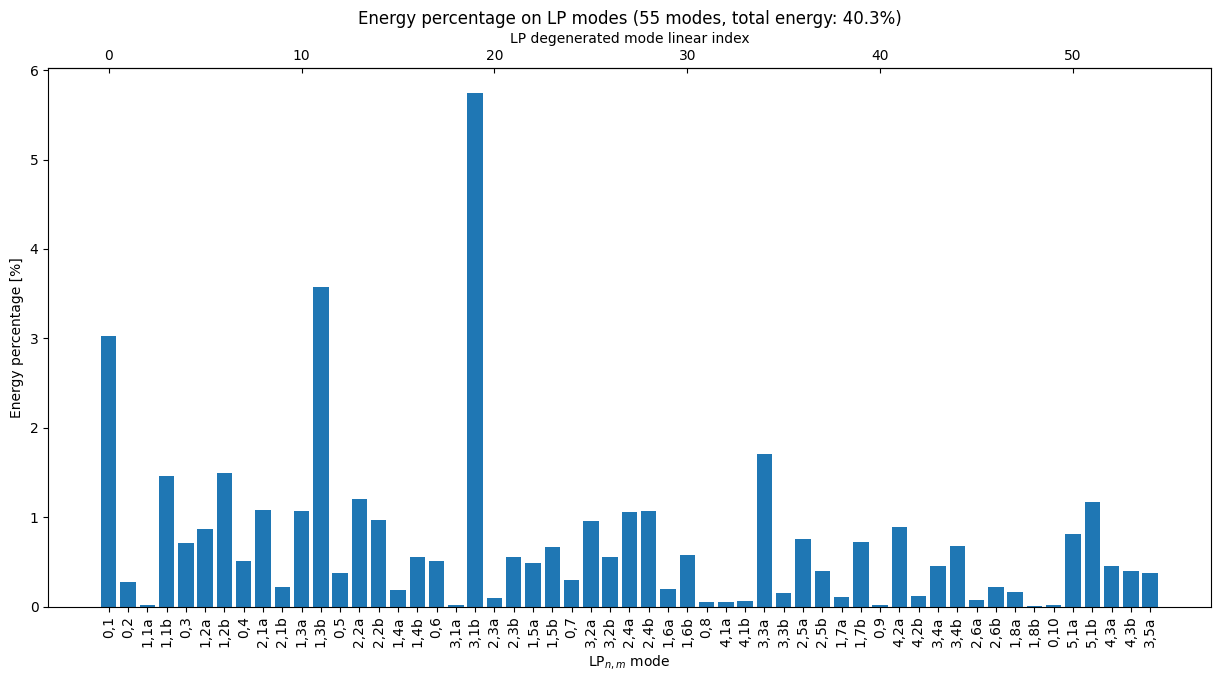

In [27]:
# phase_map = 2*np.pi*np.random.rand(12,12)

dm = MockDeformableMirror(pixel_size=100e-6, pixel_numbers=(128,128))
dm.apply_phase_map(phase_map)
dm_grid = grids.Grid(pixel_size=dm.pixel_size, pixel_numbers=dm.pixel_numbers)
beam = beams.GaussianBeam(dm_grid)
beam.compute(amplitude=1, width=5000e-6, centers=[0,0])
dm.apply_amplitude_map(beam.amplitude)
dm.reduce_by(200)
dm.plot()

beam.grid.reduce_by(200)
beam.field = dm._field_matrix 
beam.normalize_by_energy()
coupled_in = GrinFiberDegenCoupler(beam.field, beam.grid, fiber, N_modes=55)
coupled_in.plot(cmap='gray', complex=True)
coupled_in.plot_coefficients()